# Monty Hall Problem

In [3]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD


# Defining the network structure
model = BayesianNetwork([("C", "H"), ("P", "H")])

# Defining the CPDs:
cpd_c = TabularCPD("C", 3, [[0.33], [0.33], [0.33]])
cpd_p = TabularCPD("P", 3, [[0.33], [0.33], [0.33]])
cpd_h = TabularCPD(
    "H",
    3,
    [
        [0, 0, 0, 0, 0.5, 1, 0, 1, 0.5],
        [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5],
        [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0],
    ],
    evidence=["C", "P"],
    evidence_card=[3, 3],
)

# Associating the CPDs with the network structure.
model.add_cpds(cpd_c, cpd_p, cpd_h)

# Some other methods
model.get_cpds()


c:\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[<TabularCPD representing P(C:3) at 0x20830766c70>,
 <TabularCPD representing P(P:3) at 0x208306e3a00>,
 <TabularCPD representing P(H:3 | C:3, P:3) at 0x20830562d30>]

In [4]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
posterior_p = infer.query(["P"], evidence={"C": 0, "H": 2})
print(posterior_p)

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+------+----------+
| P    |   phi(P) |
+======+==========+
| P(0) |   0.3333 |
+------+----------+
| P(1) |   0.6667 |
+------+----------+
| P(2) |   0.0000 |
+------+----------+


C:\Users\utente\AppData\Local\Temp\ipykernel_1212\2698921577.py:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_df['(Y|X)'])


<AxesSubplot: xlabel='(Y|X)', ylabel='Density'>

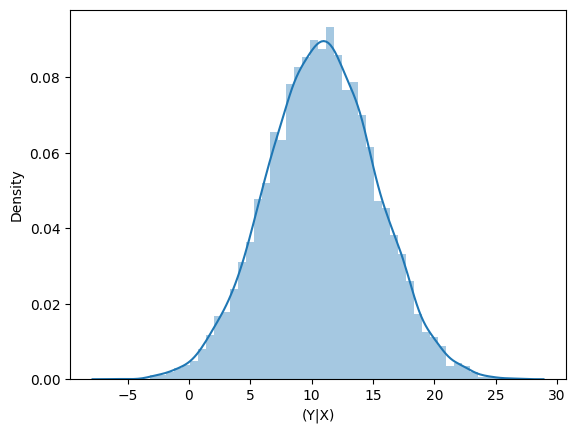

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
beta_vec = np.array([.7, .3])
beta_0 = 2
sigma_c = 4

def genYX(x):
    '''
    Generates samples distributed according to Gaussian Normal Distributions.
    Args:
        x (row): Dataframe row 
    Returns:
        (float): Sample distributed as Gaussian
        
    '''
    x = [x['X1'], x['X2']]
    var_mean = np.dot(beta_vec.transpose(), x) + beta_0
    Yx_sample = np.random.normal(var_mean, sigma_c, 1)
    return Yx_sample[0]

X_df['(Y|X)'] = X_df.apply(genYX, axis=1)
X_df.head()

sns.distplot(X_df['(Y|X)'])